In [1]:
import pandas as pd
vv = pd.read_csv('vara.csv')
ar = pd.read_csv('arezzo.csv')

In [2]:
print(type(vv))

<class 'pandas.core.frame.DataFrame'>


In [3]:
vv.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,1.08158,1.08158,1.08158,1.08158,0.866204,6990.0
1,2000-01-04,1.08158,1.08158,1.08158,1.08158,0.866204,16309.0
2,2000-01-05,1.08158,1.08158,1.08158,1.08158,0.866204,16309.0
3,2000-01-06,1.08158,1.08158,1.08158,1.08158,0.866204,100963.0
4,2000-01-07,1.08158,1.08158,1.08158,1.08158,0.866204,777.0


In [12]:
vv.shape


(5106, 7)

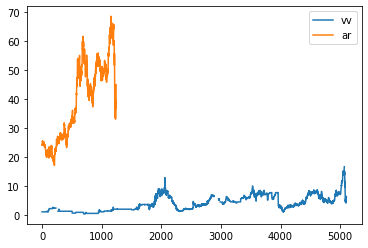

In [67]:
#comparação gráfica inicial Arezzo vs Via Varejo; arezzo definida como ar e via varejo como vv
import matplotlib.pyplot as plt
vv['Close'].plot(label='vv')
ar['Close'].plot(label='ar')
plt.legend()
plt.show()

In [50]:
#criação das colunas de retornos e retornos diários
vv['Returns'] = vv['Close'] - vv['Open']
vv.tail()
vv['Daily Ret'] = vv['Returns'] / vv['Close']
vv.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Returns,Daily Ret
5101,2020-04-08,4.35,5.15,4.28,5.03,5.03,120215800.0,0.68,0.135189
5102,2020-04-09,5.32,5.54,5.01,5.15,5.15,114671500.0,-0.17,-0.033010
5103,2020-04-13,5.05,5.45,5.02,5.40,5.40,74853000.0,0.35,0.064815
5104,2020-04-14,5.68,6.10,5.62,6.05,6.05,93015800.0,0.37,0.061157
5105,2020-04-15,5.77,6.57,5.66,6.36,6.36,114630700.0,0.59,0.092767


In [53]:
#criação de uma coluna para identificar as rentabilidades positivas(>0) e as negativas(<0)
vv['Direction'] = [1 if vv.loc[ei,'Returns']> 0 else -1
                  for ei in vv.index]

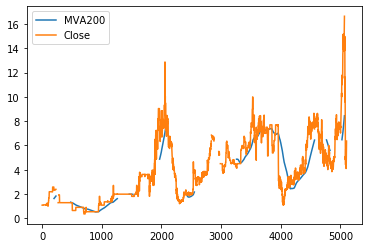

In [69]:
#criação das médias móveis para a visualização de tendências de trading
vv['MVA200'] = vv['Close'].rolling(200).mean()
vv.tail()
vv['MVA40'] = vv['Close'].rolling(40).mean()
vv['MVA200'].plot()
vv['Close'].plot()
plt.legend()

In [70]:
vv.describe()

,Open,High,Low,Close,Adj Close,Volume,Returns,Daily Ret,Direction,MVA200,MVA40
count,4880.000000,4880.000000,4880.000000,4880.000000,4880.000000,4.880000e+03,4880.000000,4880.000000,5106.000000,2566.000000,0.0
mean,4.022212,4.070066,3.927985,3.973378,3.603475,2.557371e+06,-0.048834,-0.025126,-0.703486,3.764210,NaN
std,2.652140,2.689498,2.595540,2.636157,2.569098,1.384682e+07,0.396169,0.215299,0.710779,2.464674,NaN
min,0.361510,0.361510,0.361510,0.361510,0.289522,0.000000e+00,-13.556470,-6.024923,-1.000000,0.524185,NaN
25%,1.988290,1.988290,1.885625,1.917500,1.592360,0.000000e+00,0.000000,0.000000,-1.000000,1.281336,NaN
50%,3.600000,3.615070,3.500000,3.545000,3.021597,0.000000e+00,0.000000,0.000000,-1.000000,3.566975,NaN
75%,6.000000,6.102500,5.990000,6.000000,5.361791,9.600000e+03,0.000000,0.000000,-1.000000,6.156613,NaN
max,18.075300,18.075300,15.770000,16.639999,16.639999,5.399875e+08,2.000000,0.266667,1.000000,8.445700,NaN


In [73]:
vv['PriceDiff'] = vv['Close'].shift(-1) - vv['Close']
vv.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Returns,Daily Ret,Direction,MVA200,MVA40,PriceDiff
5101,2020-04-08,4.35,5.15,4.28,5.03,5.03,120215800.0,0.68,0.135189,1,NaN,NaN,0.12
5102,2020-04-09,5.32,5.54,5.01,5.15,5.15,114671500.0,-0.17,-0.033010,-1,NaN,NaN,0.25
5103,2020-04-13,5.05,5.45,5.02,5.40,5.40,74853000.0,0.35,0.064815,1,NaN,NaN,0.65
5104,2020-04-14,5.68,6.10,5.62,6.05,6.05,93015800.0,0.37,0.061157,1,NaN,NaN,0.31
5105,2020-04-15,5.77,6.57,5.66,6.36,6.36,114630700.0,0.59,0.092767,1,NaN,NaN,NaN


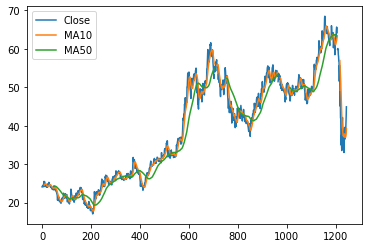

In [70]:
ar['MA10'] = ar['Close'].rolling(10).mean()
ar['MA50'] = ar['Close'].rolling(50).mean()
ar['Close'].plot()
ar['MA10'].plot()
ar['MA50'].plot()
plt.legend()

In [11]:
#criação do identifcador para trendfollowing shares, quando esse >0 significa sinal de compra do papel
ar['Shares'] = [1 if ar.loc[ei,'MA10']>ar.loc[ei,'MA50']else 0
                for ei in ar.index]
ar.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,Shares
1239,2020-04-14,37.000000,39.599998,37.000000,37.400002,37.400002,798700.0,36.959999,NaN,0
1240,2020-04-15,36.820000,39.810001,36.500000,38.380001,38.380001,758700.0,37.111000,NaN,0
1241,2020-04-16,38.509998,40.099998,37.700001,40.099998,40.099998,862200.0,37.511000,NaN,0
1242,2020-04-17,41.000000,43.340000,40.349998,42.299999,42.299999,846600.0,38.131999,NaN,0
1243,2020-04-20,42.000000,46.450001,41.110001,44.930000,44.930000,836900.0,39.322000,NaN,0


In [12]:
#criando daily profit
ar['Close1'] = ar['Close'].shift(-1)
ar.iloc[1000:1200,:]

,Date,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,Shares,Close1
1000,2019-04-29,51.680000,51.680000,49.830002,50.080002,49.525795,229600.0,48.586001,NaN,0,51.000000
1001,2019-04-30,50.110001,51.000000,49.570000,51.000000,50.435616,387700.0,48.846000,NaN,0,50.000000
1002,2019-05-02,50.689999,50.779999,49.470001,50.000000,49.637852,144900.0,49.135000,NaN,0,51.180000
1003,2019-05-03,50.470001,51.180000,49.720001,51.180000,50.809303,206600.0,49.633000,NaN,0,50.200001
1004,2019-05-06,50.700001,50.950001,49.799999,50.200001,49.836399,215000.0,49.913000,NaN,0,50.660000
...,...,...,...,...,...,...,...,...,...,...,...
1195,2020-02-07,60.759998,61.240002,58.950001,60.680000,60.680000,360000.0,62.152000,63.6338,0,58.480000
1196,2020-02-10,60.669998,60.860001,57.709999,58.480000,58.480000,534700.0,61.731000,63.5494,0,59.689999
1197,2020-02-11,58.889999,59.779999,58.080002,59.689999,59.689999,425500.0,61.336000,63.4992,0,61.799999
1198,2020-02-12,59.790001,61.799999,59.180000,61.799999,61.799999,513600.0,61.092000,63.4896,0,63.630001


In [13]:
ar['Profit'] = [ar.loc[ei,'Close1']-ar.loc[ei,'Close']
                if ar.loc[ei,'Shares']==1
                else 0 for ei in ar.index]

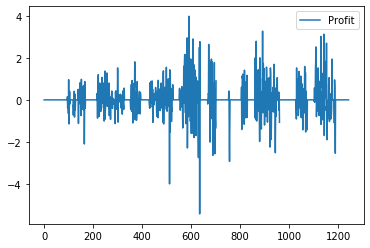

In [71]:
ar['Profit'].plot()
plt.legend()


In [15]:
ar['Wealth'] = ar['Profit'].cumsum()
ar.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,Shares,Close1,Profit,Wealth
1239,2020-04-14,37.000000,39.599998,37.000000,37.400002,37.400002,798700.0,36.959999,NaN,0,38.380001,0.0,27.699997
1240,2020-04-15,36.820000,39.810001,36.500000,38.380001,38.380001,758700.0,37.111000,NaN,0,40.099998,0.0,27.699997
1241,2020-04-16,38.509998,40.099998,37.700001,40.099998,40.099998,862200.0,37.511000,NaN,0,42.299999,0.0,27.699997
1242,2020-04-17,41.000000,43.340000,40.349998,42.299999,42.299999,846600.0,38.131999,NaN,0,44.930000,0.0,27.699997
1243,2020-04-20,42.000000,46.450001,41.110001,44.930000,44.930000,836900.0,39.322000,NaN,0,NaN,0.0,27.699997


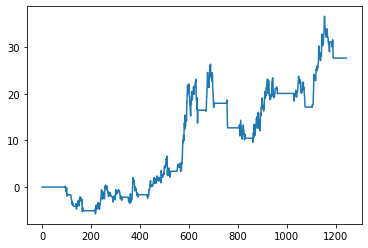

In [16]:
ar['Wealth'].plot()

In [19]:
vv['MA10'] = vv['Close'].rolling(10).mean()
vv['MA50'] = vv['Close'].rolling(50).mean()

vv['Shares'] = [1 if vv.loc[ei,'MA10']>vv.loc[ei,'MA50']else 0
                for ei in vv.index]
vv.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,Shares
5101,2020-04-08,4.35,5.15,4.28,5.03,5.03,120215800.0,4.907,NaN,0
5102,2020-04-09,5.32,5.54,5.01,5.15,5.15,114671500.0,4.852,NaN,0
5103,2020-04-13,5.05,5.45,5.02,5.40,5.40,74853000.0,4.822,NaN,0
5104,2020-04-14,5.68,6.10,5.62,6.05,6.05,93015800.0,4.882,NaN,0
5105,2020-04-15,5.77,6.57,5.66,6.36,6.36,114630700.0,4.990,NaN,0


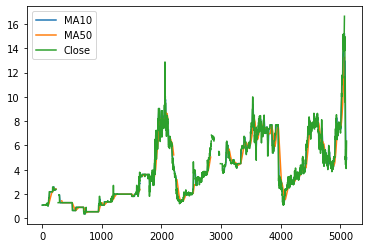

In [29]:
import matplotlib.pyplot as plt 
vv['MA10'].plot(label='MA10')
vv['MA50'].plot(label='MA50')
vv['Close'].plot(label='Close')
plt.legend()
plt.show()

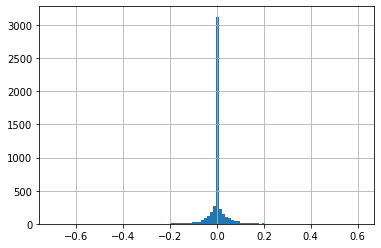

In [31]:
import numpy as np
vv['LogReturn'] = np.log(vv['Close']).shift(-1)-np.log(vv['Close'])
vv['LogReturn'].hist(bins=100)

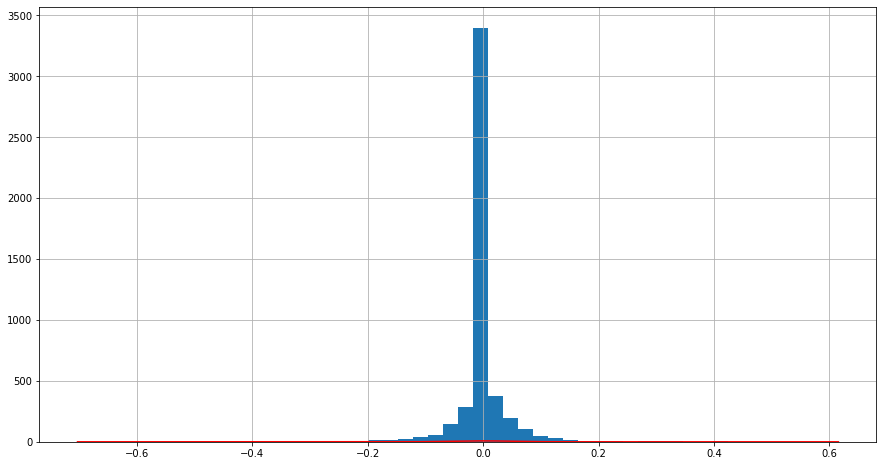

In [35]:
#distribuição normal do papel VVAR3
from scipy.stats import norm
mu = vv['LogReturn'].mean()
sigma = vv['LogReturn'].std(ddof=1)

density = pd.DataFrame()
density['x'] = np.arange(vv['LogReturn'].min()-0.01, vv['LogReturn'].max()+0.01, 0.001)
density['pdf'] = norm.pdf(density['x'], mu, sigma)

vv['LogReturn'].hist(bins=50, figsize=(15, 8))
plt.plot(density['x'], density['pdf'], color='red')
plt.show()


In [39]:
#probabilidade da VVAR3 cair 5% em 1 dia
prob_return1 = norm.cdf(-0.05, mu, sigma)
print('A probabilidade é de  ', prob_return1)

A probabilidade é de   0.1692737127496205


In [41]:
#probabilidade da VVAR3 cair 10% em 1 dia
prob_return2 = norm.cdf(-0.1,mu,sigma)
print('A probabilidade é de ',prob_return2)

A probabilidade é de  0.028344765167139623


In [45]:
#probabilidade de queda em 1 ano(252 dias úteis) de 20%
mu252 = 252*mu
sigma252 = (252**0.5) * sigma

print('A probabilidade de queda da VVAR3 de 20% em 252 dias é ',  norm.cdf(-0.2, mu252, sigma252))


A probabilidade de queda da VVAR3 de 20% em 252 dias é  0.35491186273884834


In [47]:
#Value at Risk
var = norm.ppf(0.05,mu,sigma)
print('var de',var )

var de -0.08625197683018457


In [49]:
#quantis
print('5% quantile ', norm.ppf(0.05, mu, sigma))
print('95% quantile ', norm.ppf(0.95, mu, sigma))

5% quantile  -0.08625197683018457
95% quantile  0.0871354975239989


In [60]:
#mensuração de risco arezzo - queda 5% no dia
ar['LogReturn'] = np.log(ar['Close']).shift(-1)-np.log(ar['Close'])
mu2 = ar['LogReturn'].mean()
sigma2 = ar['LogReturn'].std(ddof=1)
prob1 = norm.cdf(-0.05,mu2,sigma2)
print('a probabilidade de cair 5% no dia é de',prob1)

a probabilidade de cair 5% no dia é de 0.02310731506752582


In [56]:
prob2 = norm.cdf(-0.1,mu,sigma)
print('a probabilidade do papel AREZZ3 cair 10% no dia é de',prob2)


a probabilidade do papel AREZZ3 cair 10% no dia é de 0.028344765167139623


In [64]:
#cálculo da chance de queda de 10% do papel AREZZ3 em 1 ano
mu_ar_252 = mu2*252
sigma_ar_252 = (252**0.5) * sigma
print('A probabilidade de queda anual de 10% do papel AREZZ3  é de ',norm.cdf(-0.1,mu_ar_252,sigma_ar_252))
print('5% quantile ', norm.ppf(0.05, mu2, sigma2))
print('95% quantile ', norm.ppf(0.95, mu2, sigma2))

A probabilidade de queda anual de 10% do papel AREZZ3  é de  0.3860425112826277
5% quantile  -0.04115814464347452
95% quantile  0.04228785900809843
